In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import anndata

In [4]:
from spaceoracle.models.estimators import GCNNWR 
from spaceoracle.tools.data import load_example_slideseq, filter_adata
from spaceoracle.tools.network import GeneRegulatoryNetwork

In [5]:
# slideseq_data = load_example_slideseq('../data/slideseq/')
# slideseq_data

In [6]:
# adata_train = slideseq_data[3][1].copy()
# adata_test = slideseq_data[2][1].copy()

# slideseq_data[3][0], slideseq_data[2][0]

In [7]:
# rctd_results_1 = pd.read_csv('../data/slideseq/day3_1_rctd.csv', index_col=0)
# rctd_results_2 = pd.read_csv('../data/slideseq/day3_2_rctd.csv', index_col=0)

In [8]:
# adata_train = adata_train[adata_train.obs.index.isin(rctd_results_1.index)]
# adata_train.obsm['rctd_results'] = adata_train.obs.join(rctd_results_1)
# adata_train.obsm['rctd_results'].first_type = adata_train.obsm['rctd_results'].first_type - 1
# adata_train.obsm['rctd_results'].first_type = adata_train.obsm['rctd_results'].first_type.astype(int)
# adata_train.obsm['rctd_results'].first_type = adata_train.obsm['rctd_results'].first_type.astype('category')
# adata_train = adata_train[adata_train.obsm['rctd_results'].spot_class == 'singlet']
# adata_train.obs['rctd_cluster'] = adata_train.obsm['rctd_results'].first_type
# adata_train

In [9]:
# adata_test = adata_test[adata_test.obs.index.isin(rctd_results_2.index)]
# adata_test.obsm['rctd_results'] = adata_test.obs.join(rctd_results_2)
# adata_test.obsm['rctd_results'].first_type = adata_test.obsm['rctd_results'].first_type - 1
# adata_test.obsm['rctd_results'].first_type = adata_test.obsm['rctd_results'].first_type.astype(int)
# adata_test.obsm['rctd_results'].first_type = adata_test.obsm['rctd_results'].first_type.astype('category')
# adata_test = adata_test[adata_test.obsm['rctd_results'].spot_class == 'singlet']
# adata_test.obs['rctd_cluster'] = adata_test.obsm['rctd_results'].first_type
# adata_test

In [10]:
# adata_train.write_h5ad('../data/slideseq/day3_1.h5ad')
# adata_test.write_h5ad('../data/slideseq/day3_2.h5ad')

In [81]:
# adata_train = anndata.read_h5ad('../data/slideseq/day3_1.h5ad')
# adata_test = anndata.read_h5ad('../data/slideseq/day3_2.h5ad')

adata_test = anndata.read_h5ad('../data/slideseq/day3_1.h5ad')
adata_train = anndata.read_h5ad('../data/slideseq/day3_2.h5ad')

In [82]:
n_top_genes = 5000
min_cells = 10
min_counts = 300

adata_train.var_names_make_unique()
adata_train.var["mt"] = adata_train.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_train, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata_train, min_counts=min_counts)
adata_train = adata_train[adata_train.obs["pct_counts_mt"] < 20].copy()
adata_train = adata_train[:, ~adata_train.var["mt"]]
sc.pp.filter_genes(adata_train, min_cells=min_cells)

adata_train.layers["raw_count"] = adata_train.X

sc.pp.normalize_total(adata_train, inplace=True)
sc.pp.log1p(adata_train)
sc.pp.highly_variable_genes(
    adata_train, flavor="seurat", n_top_genes=n_top_genes)

adata_train = adata_train[:, adata_train.var.highly_variable]
adata_train

View of AnnData object with n_obs × n_vars = 12006 × 5000
    obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

In [83]:
adata_test.var_names_make_unique()
adata_test.var["mt"] = adata_test.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_test, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata_test, min_counts=min_counts)
adata_test = adata_test[adata_test.obs["pct_counts_mt"] < 20].copy()
adata_test = adata_test[:, ~adata_test.var["mt"]]
sc.pp.filter_genes(adata_test, min_cells=min_cells)

adata_test.layers["raw_count"] = adata_test.X

sc.pp.normalize_total(adata_test, inplace=True)
sc.pp.log1p(adata_test)
sc.pp.highly_variable_genes(
    adata_test, flavor="seurat", n_top_genes=n_top_genes)

adata_test = adata_test[:, adata_test.var.highly_variable]
adata_test

View of AnnData object with n_obs × n_vars = 10277 × 5000
    obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'rctd_cluster_colors', 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

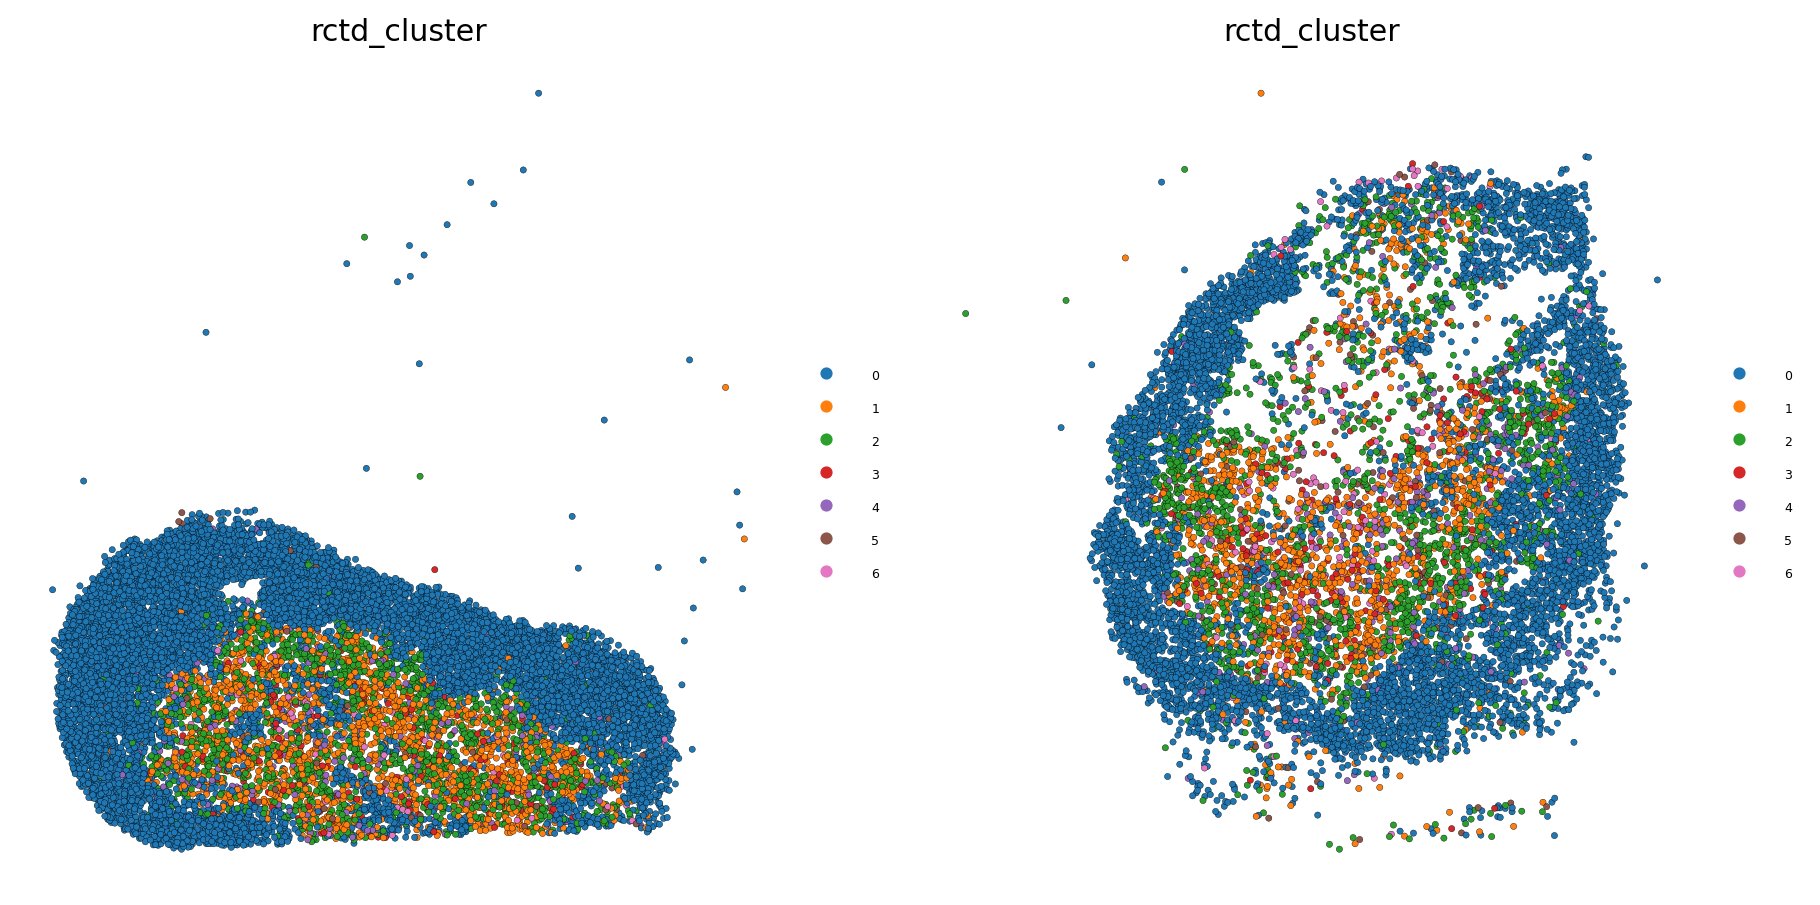

In [84]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 180

f, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=180)

sc.pl.embedding(adata_train, color='rctd_cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15, ax=axs[0])
sc.pl.embedding(adata_test, color='rctd_cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15, ax=axs[1])


fig = plt.gcf()
ax = plt.gca()

for ax in axs:
    ax.set_frame_on(False)  
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    legend = ax.get_legend()
    for text in legend.get_texts():
        text.set_fontsize(5)
    
    for handle in legend.legendHandles:
        handle._sizes = [15]

# plt.title('')
# plt.axis('off')
plt.show()

In [85]:
'Cd74' in np.intersect1d(adata_train.var_names, adata_test.var_names)

True

In [86]:
adata_train = adata_train[:, adata_train.var_names.isin(np.intersect1d(adata_train.var_names, adata_test.var_names))]
adata_test = adata_test[:, adata_test.var_names.isin(np.intersect1d(adata_train.var_names, adata_test.var_names))]

adata_train, adata_test

(View of AnnData object with n_obs × n_vars = 12006 × 2401
     obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
     var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'log1p', 'hvg', 'rctd_cluster_colors'
     obsm: 'X_spatial', 'rctd_results', 'spatial'
     layers: 'raw_count',
 View of AnnData object with n_obs × n_vars = 10277 × 2401
     obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_t

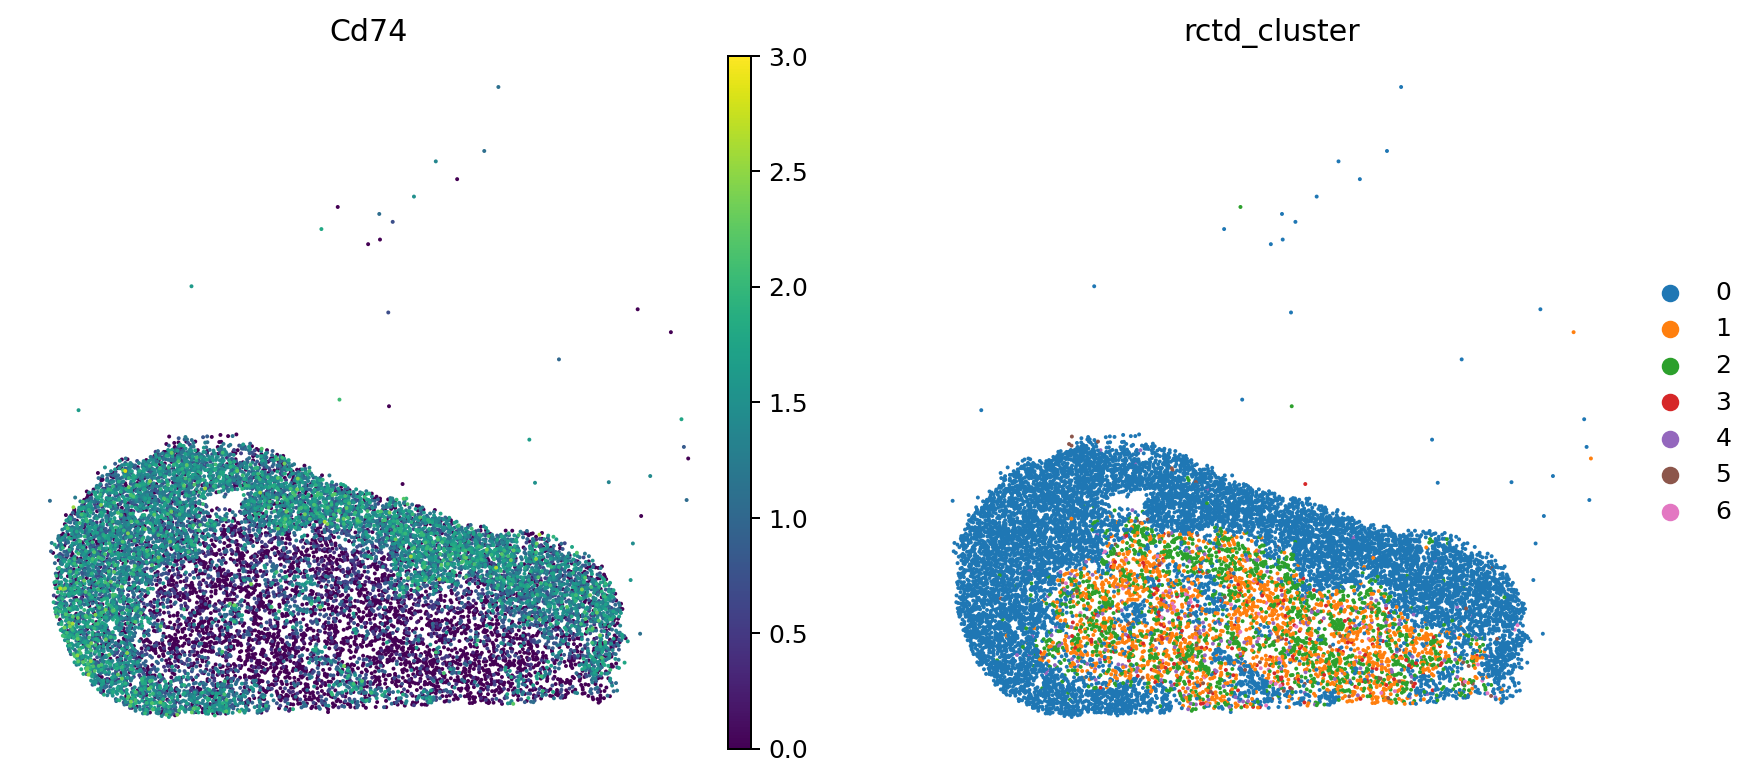

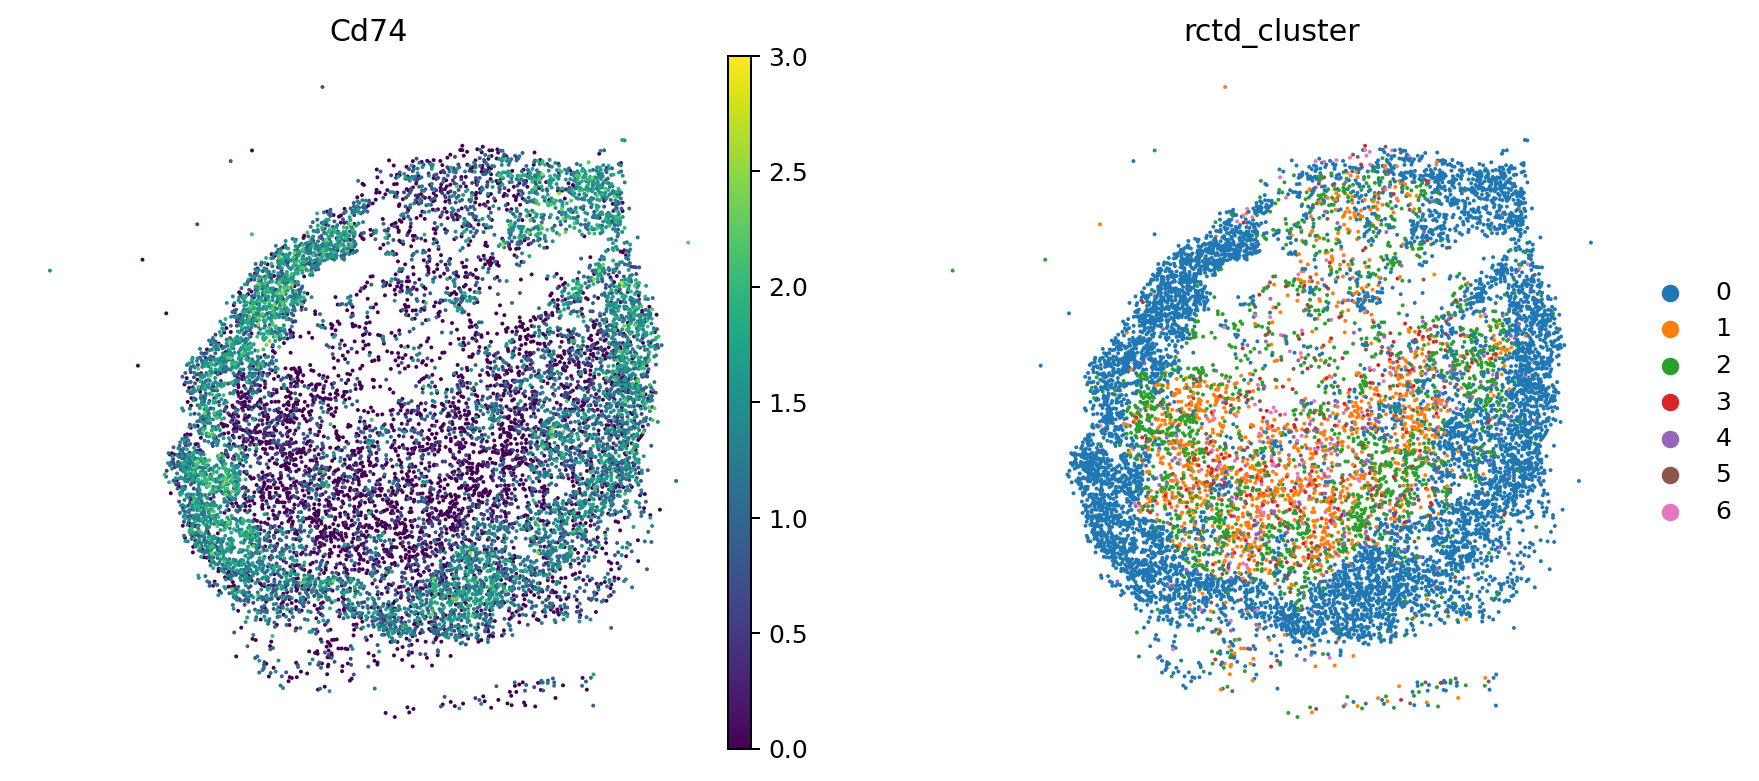

In [87]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata_train, color=['Cd74', 'rctd_cluster'], 
                frameon=False, basis="spatial", s=10, show=False, vmin=0, vmax=3)
plt.axis('off')
plt.show()

sc.pl.embedding(adata_test, color=['Cd74', 'rctd_cluster'], 
                frameon=False, basis="spatial", s=10, show=False, vmin=0, vmax=3)
plt.axis('off')
plt.show()

In [88]:
grn = GeneRegulatoryNetwork()

In [89]:
target_gene = 'Cd74'

In [90]:
regulators = grn.get_regulators(adata_train, target_gene=target_gene)
regulators, len(regulators)

(['Bcl11a',
  'Bcl11b',
  'Ebf1',
  'Ebf3',
  'Egr1',
  'Gtf3c2',
  'Hivep1',
  'Irf8',
  'Klf7',
  'Klf9',
  'Mef2a',
  'Mef2c',
  'Pax5',
  'Pou2f2',
  'Pura',
  'Rest',
  'Rreb1',
  'Rxra',
  'Smc3',
  'Stat2',
  'Taf1',
  'Tcf3',
  'Zbtb6'],
 23)

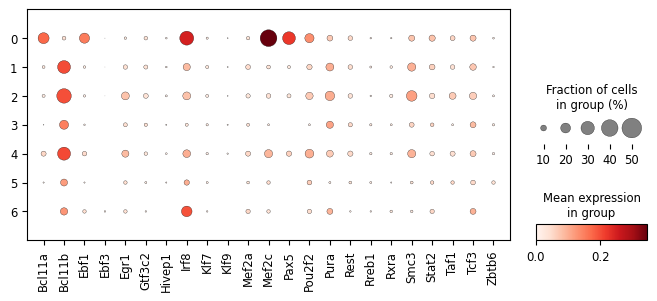

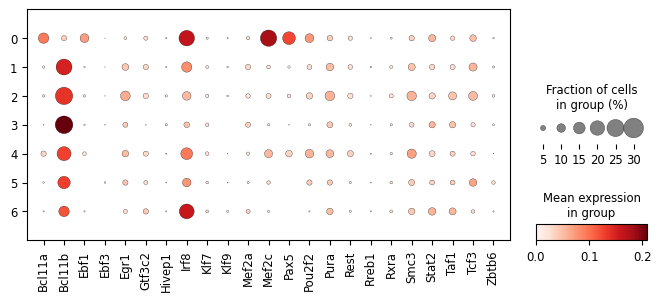

In [91]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams['figure.dpi'] = 100
sc.pl.dotplot(adata_train, var_names=regulators, groupby='rctd_cluster', figsize=(8, 3))
sc.pl.dotplot(adata_test, var_names=regulators, groupby='rctd_cluster', figsize=(8, 3))

In [93]:
from spaceoracle.models.estimators import GeoCNNEstimator

In [94]:
estimator = GeoCNNEstimator()

In [95]:
X = adata_train.to_df()[regulators]
y = adata_train.to_df()[[target_gene]]
xy = adata_train.obsm['spatial']

In [96]:
adata_train.shape, adata_train.obs['rctd_cluster'].shape

((12006, 2401), (12006,))

In [112]:
estimator.fit(
    X.values[:, :], 
    y.values[:], 
    xy[:, :], 
    labels = np.array(adata_train.obs['rctd_cluster'].values[:]),
    init_betas='ones', 
    max_epochs=50, 
    learning_rate=3e-4, 
    spatial_dim=64,
    in_channels=7,
    mode = 'train_test',
)

/ihome/ylee/kor11/space/SpaceOracle/notebooks/../src/spaceoracle/models/estimators.py:200: DeprecatedWarning: _build_dataloaders is a deprecated function. Please use the SpatialDataset class instead.
  train_dataloader, valid_dataloader = _build_dataloaders(
🌍️ Generating spatial maps: 100%|██████████| 12006/12006 [00:12<00:00, 977.81it/s]
[cuda] MSE: 0.3424 | Baseline: 4.9455: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it]

Best model at 49/50


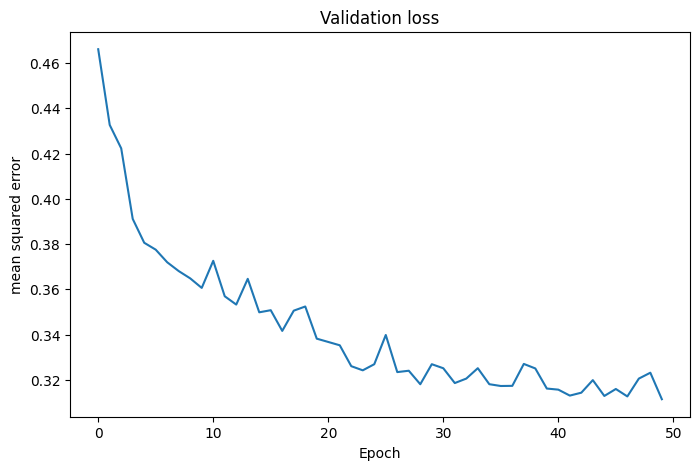

In [114]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams['figure.dpi'] = 100
plt.plot(estimator.losses)
plt.xlabel('Epoch')
plt.ylabel('mean squared error')
plt.title('Validation loss')
plt.show()

In [115]:
betas, y_pred = estimator.get_betas(
    X.values[:, :], xy[:, :], np.array(adata_train.obs['rctd_cluster'].values[:]))

/ihome/ylee/kor11/space/SpaceOracle/notebooks/../src/spaceoracle/models/estimators.py:284: DeprecatedWarning: _build_dataloaders is a deprecated function. Please use the SpatialDataset class instead.
  infer_dataloader = _build_dataloaders(
🌍️ Generating spatial maps: 100%|██████████| 12006/12006 [00:12<00:00, 976.78it/s]


In [116]:
X_test = adata_test.to_df()[regulators]
y_test = adata_test.to_df()[[target_gene]]
xy_test = adata_test.obsm['spatial']

betas_test, y_pred_test = estimator.get_betas(
    X_test.values[:, :], xy_test[:, :], np.array(adata_test.obs['rctd_cluster'].values[:]))

/ihome/ylee/kor11/space/SpaceOracle/notebooks/../src/spaceoracle/models/estimators.py:284: DeprecatedWarning: _build_dataloaders is a deprecated function. Please use the SpatialDataset class instead.
  infer_dataloader = _build_dataloaders(
🌍️ Generating spatial maps: 100%|██████████| 10277/10277 [00:10<00:00, 975.73it/s]


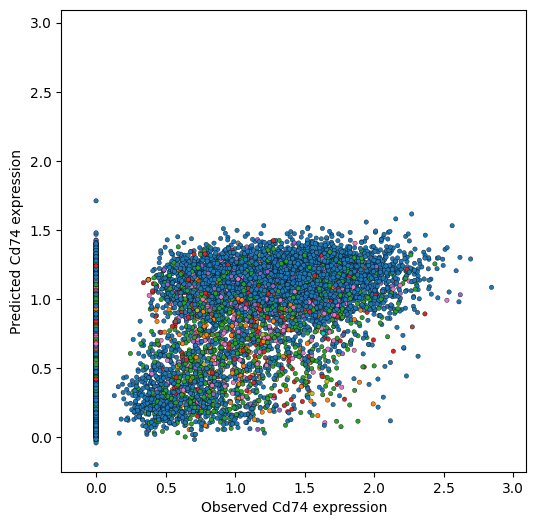

In [117]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(
    x=y.values[:, :].reshape(-1), 
    y=y_pred.reshape(-1), s=10, 
    c=adata_train.obs.cluster.values[:], cmap='tab10', edgecolor='black', linewidth=0.25)
plt.xlim(y.values[:, :].min()-0.25, y.values[:, :].max()+0.25)
plt.ylim(y.values[:, :].min()-0.25, y.values[:, :].max()+0.25)
plt.xlabel(f'Observed {target_gene} expression')
plt.ylabel(f'Predicted {target_gene} expression')
plt.show()

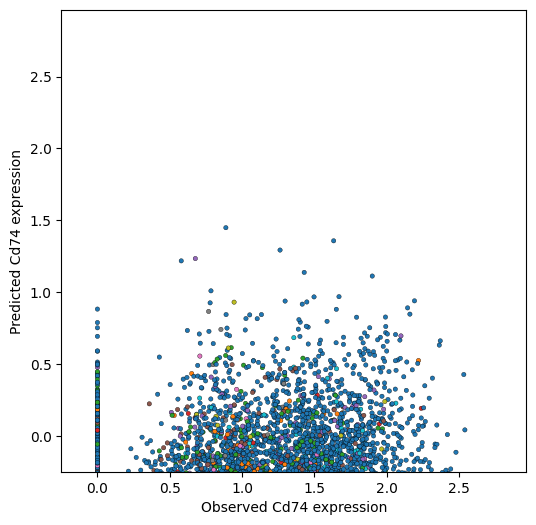

In [119]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(
    x=y_test.values[:, :].reshape(-1), 
    y=y_pred_test.reshape(-1), s=10, 
    c=adata_test.obs.cluster.values[:], cmap='tab10', edgecolor='black', linewidth=0.25)
plt.xlim(y_test.values[:, :].min()-0.25, y_test.values[:, :].max()+0.25)
plt.ylim(y_test.values[:, :].min()-0.25, y_test.values[:, :].max()+0.25)
plt.xlabel(f'Observed {target_gene} expression')
plt.ylabel(f'Predicted {target_gene} expression')
plt.show()

In [103]:
from matplotlib.colors import CenteredNorm, Normalize, TwoSlopeNorm

In [104]:
len(regulators)

23

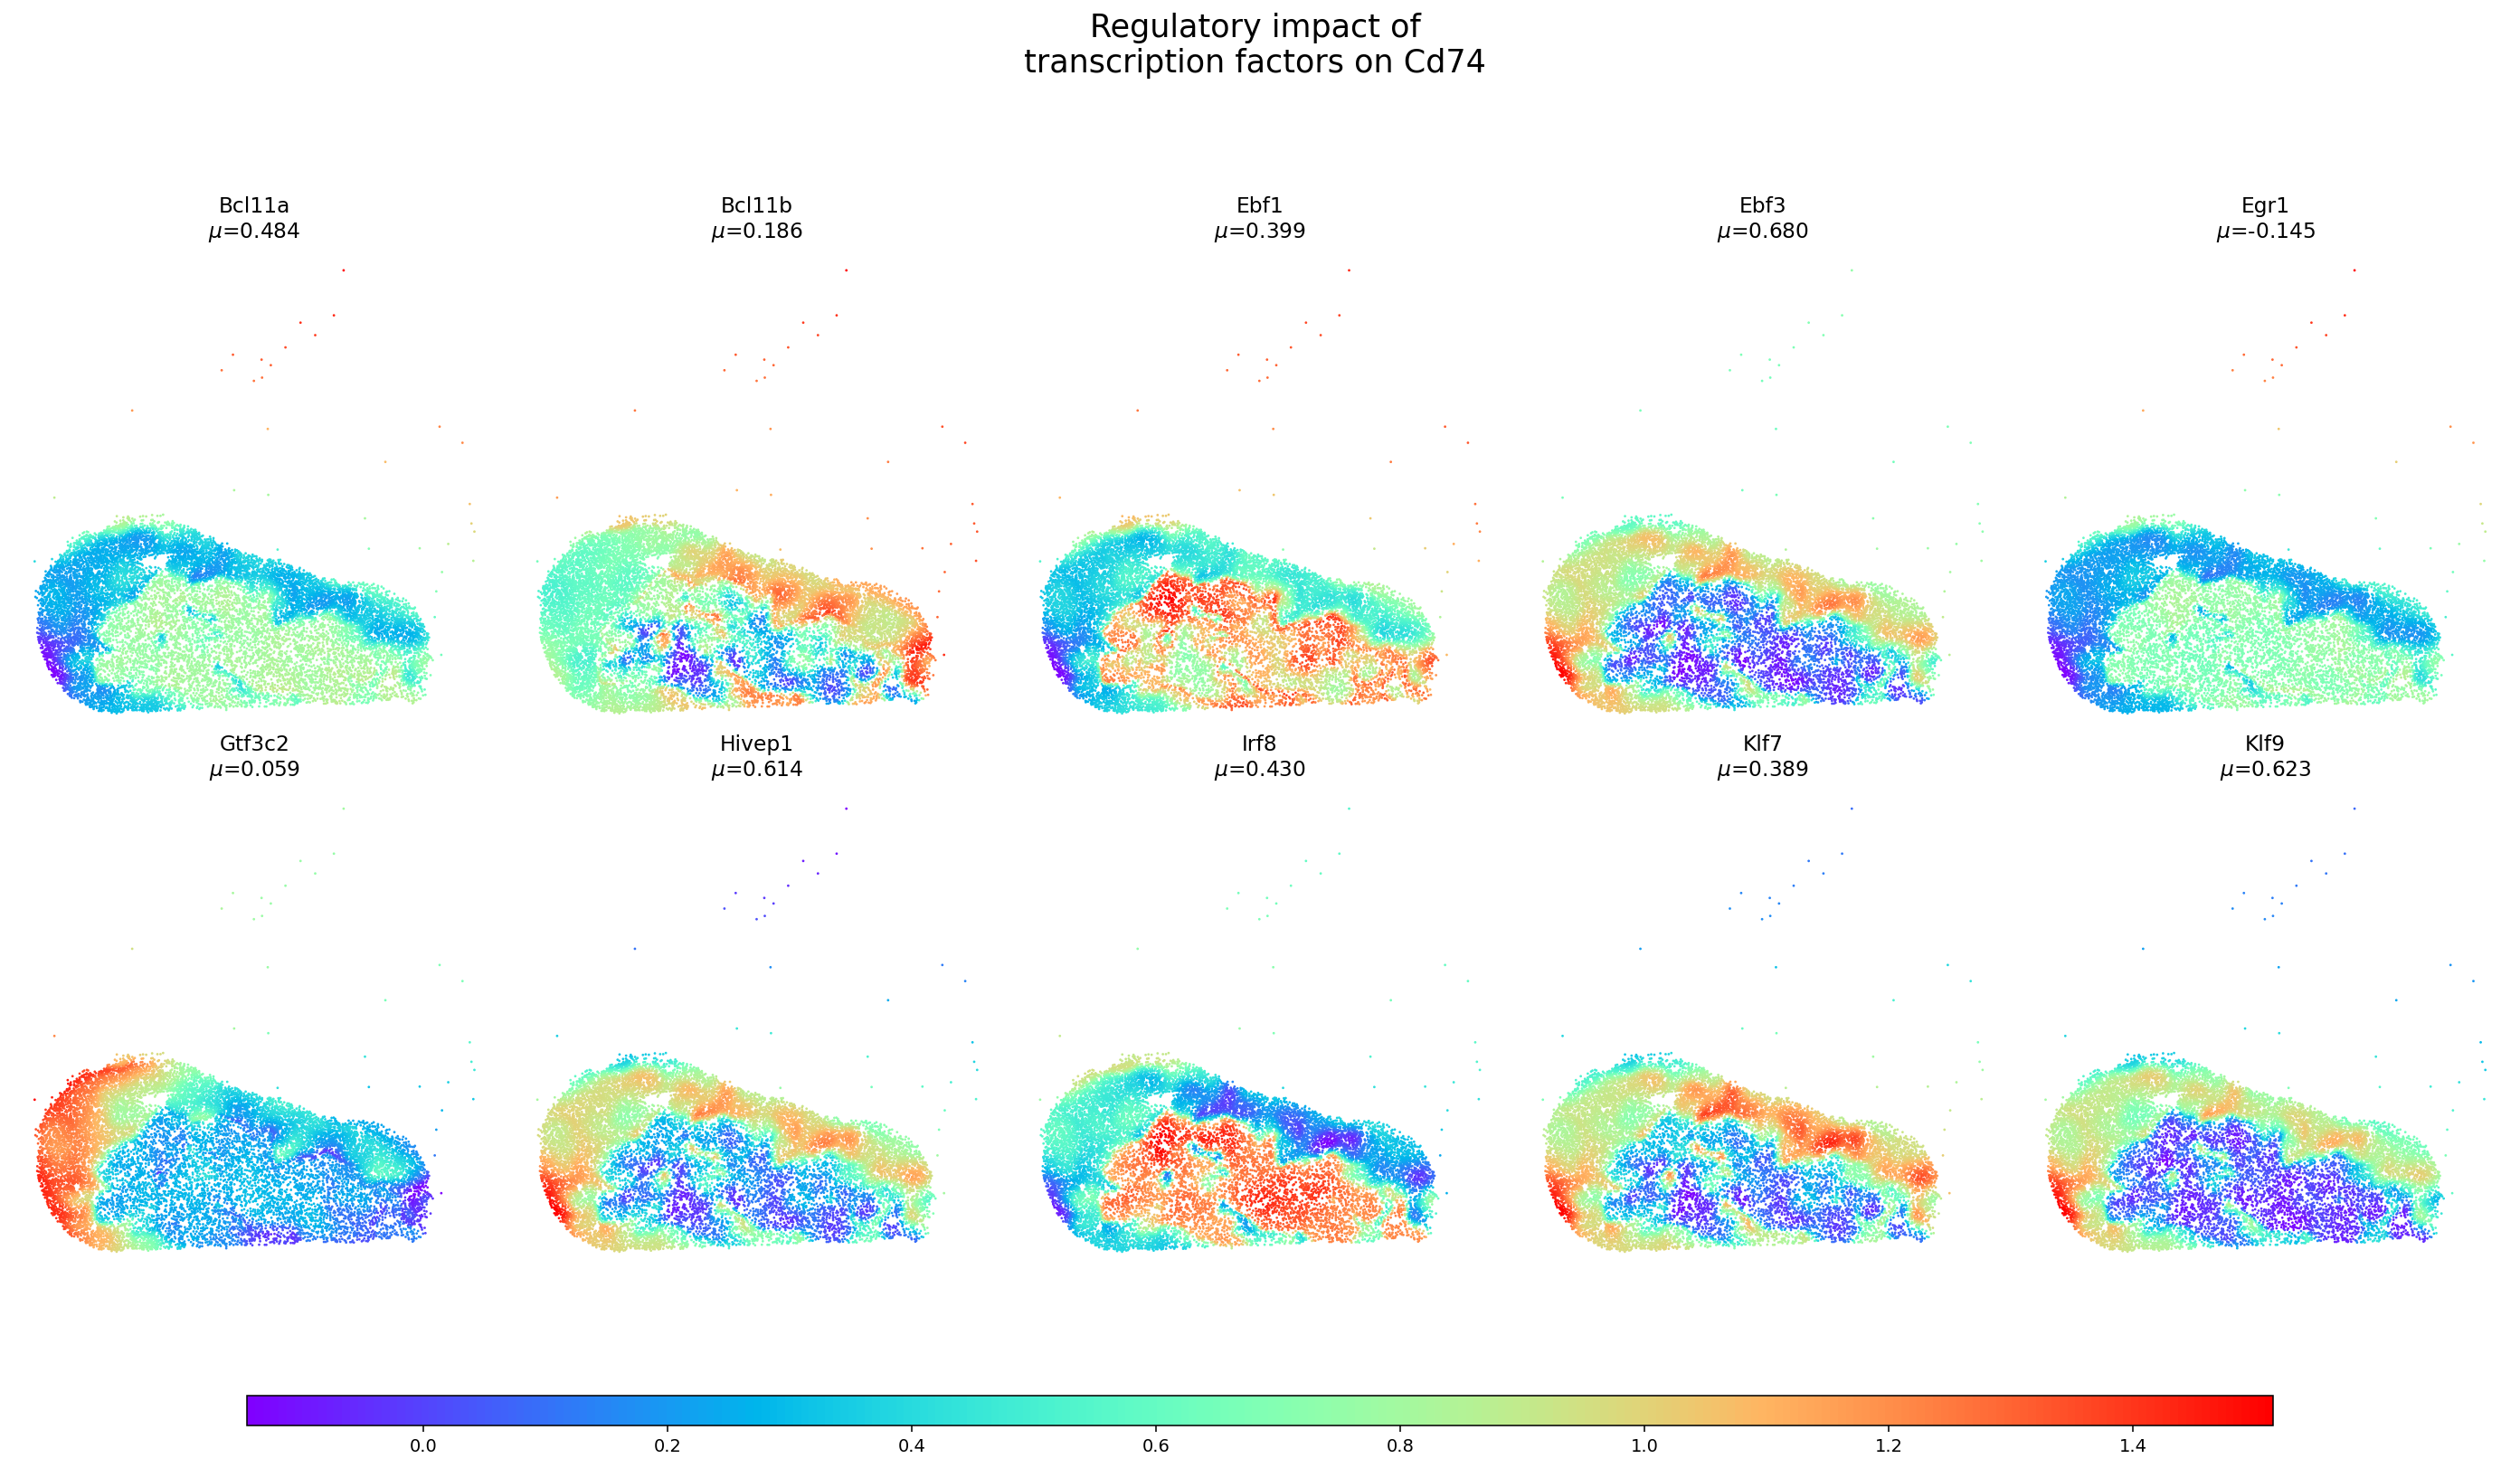

In [110]:
f, axs = plt.subplots(2, 5, figsize=(20, 12), dpi=140, sharex=True, sharey=True)
axs = axs.flatten()

scatter_plots = []

for i in range(len(axs)): 
    scatter = sns.scatterplot(x=adata_train.obsm['spatial'][:, 0], y=adata_train.obsm['spatial'][:, 1], 
                s=2, c=betas[:, i+1], cmap='rainbow', 
                ax=axs[i], edgecolor=None, linewidth=0, 
    )
    scatter_plots.append(scatter)

beta_means = list(betas.mean(0))
for ix, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{regulators[ix]}\n'+ r'$\mu$' + f'={beta_means[ix+1]:.3f}')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.tight_layout()
f.subplots_adjust(bottom=0.15)

# Add a colorbar
cbar_ax = f.add_axes([0.1, 0.05, 0.8, 0.02])
colorbar = f.colorbar(
    scatter_plots[0].collections[0], cax=cbar_ax, orientation='horizontal')


plt.suptitle(f'Regulatory impact of \ntranscription factors on {target_gene} ', fontsize=18)
plt.subplots_adjust(top=0.825)

plt.show()

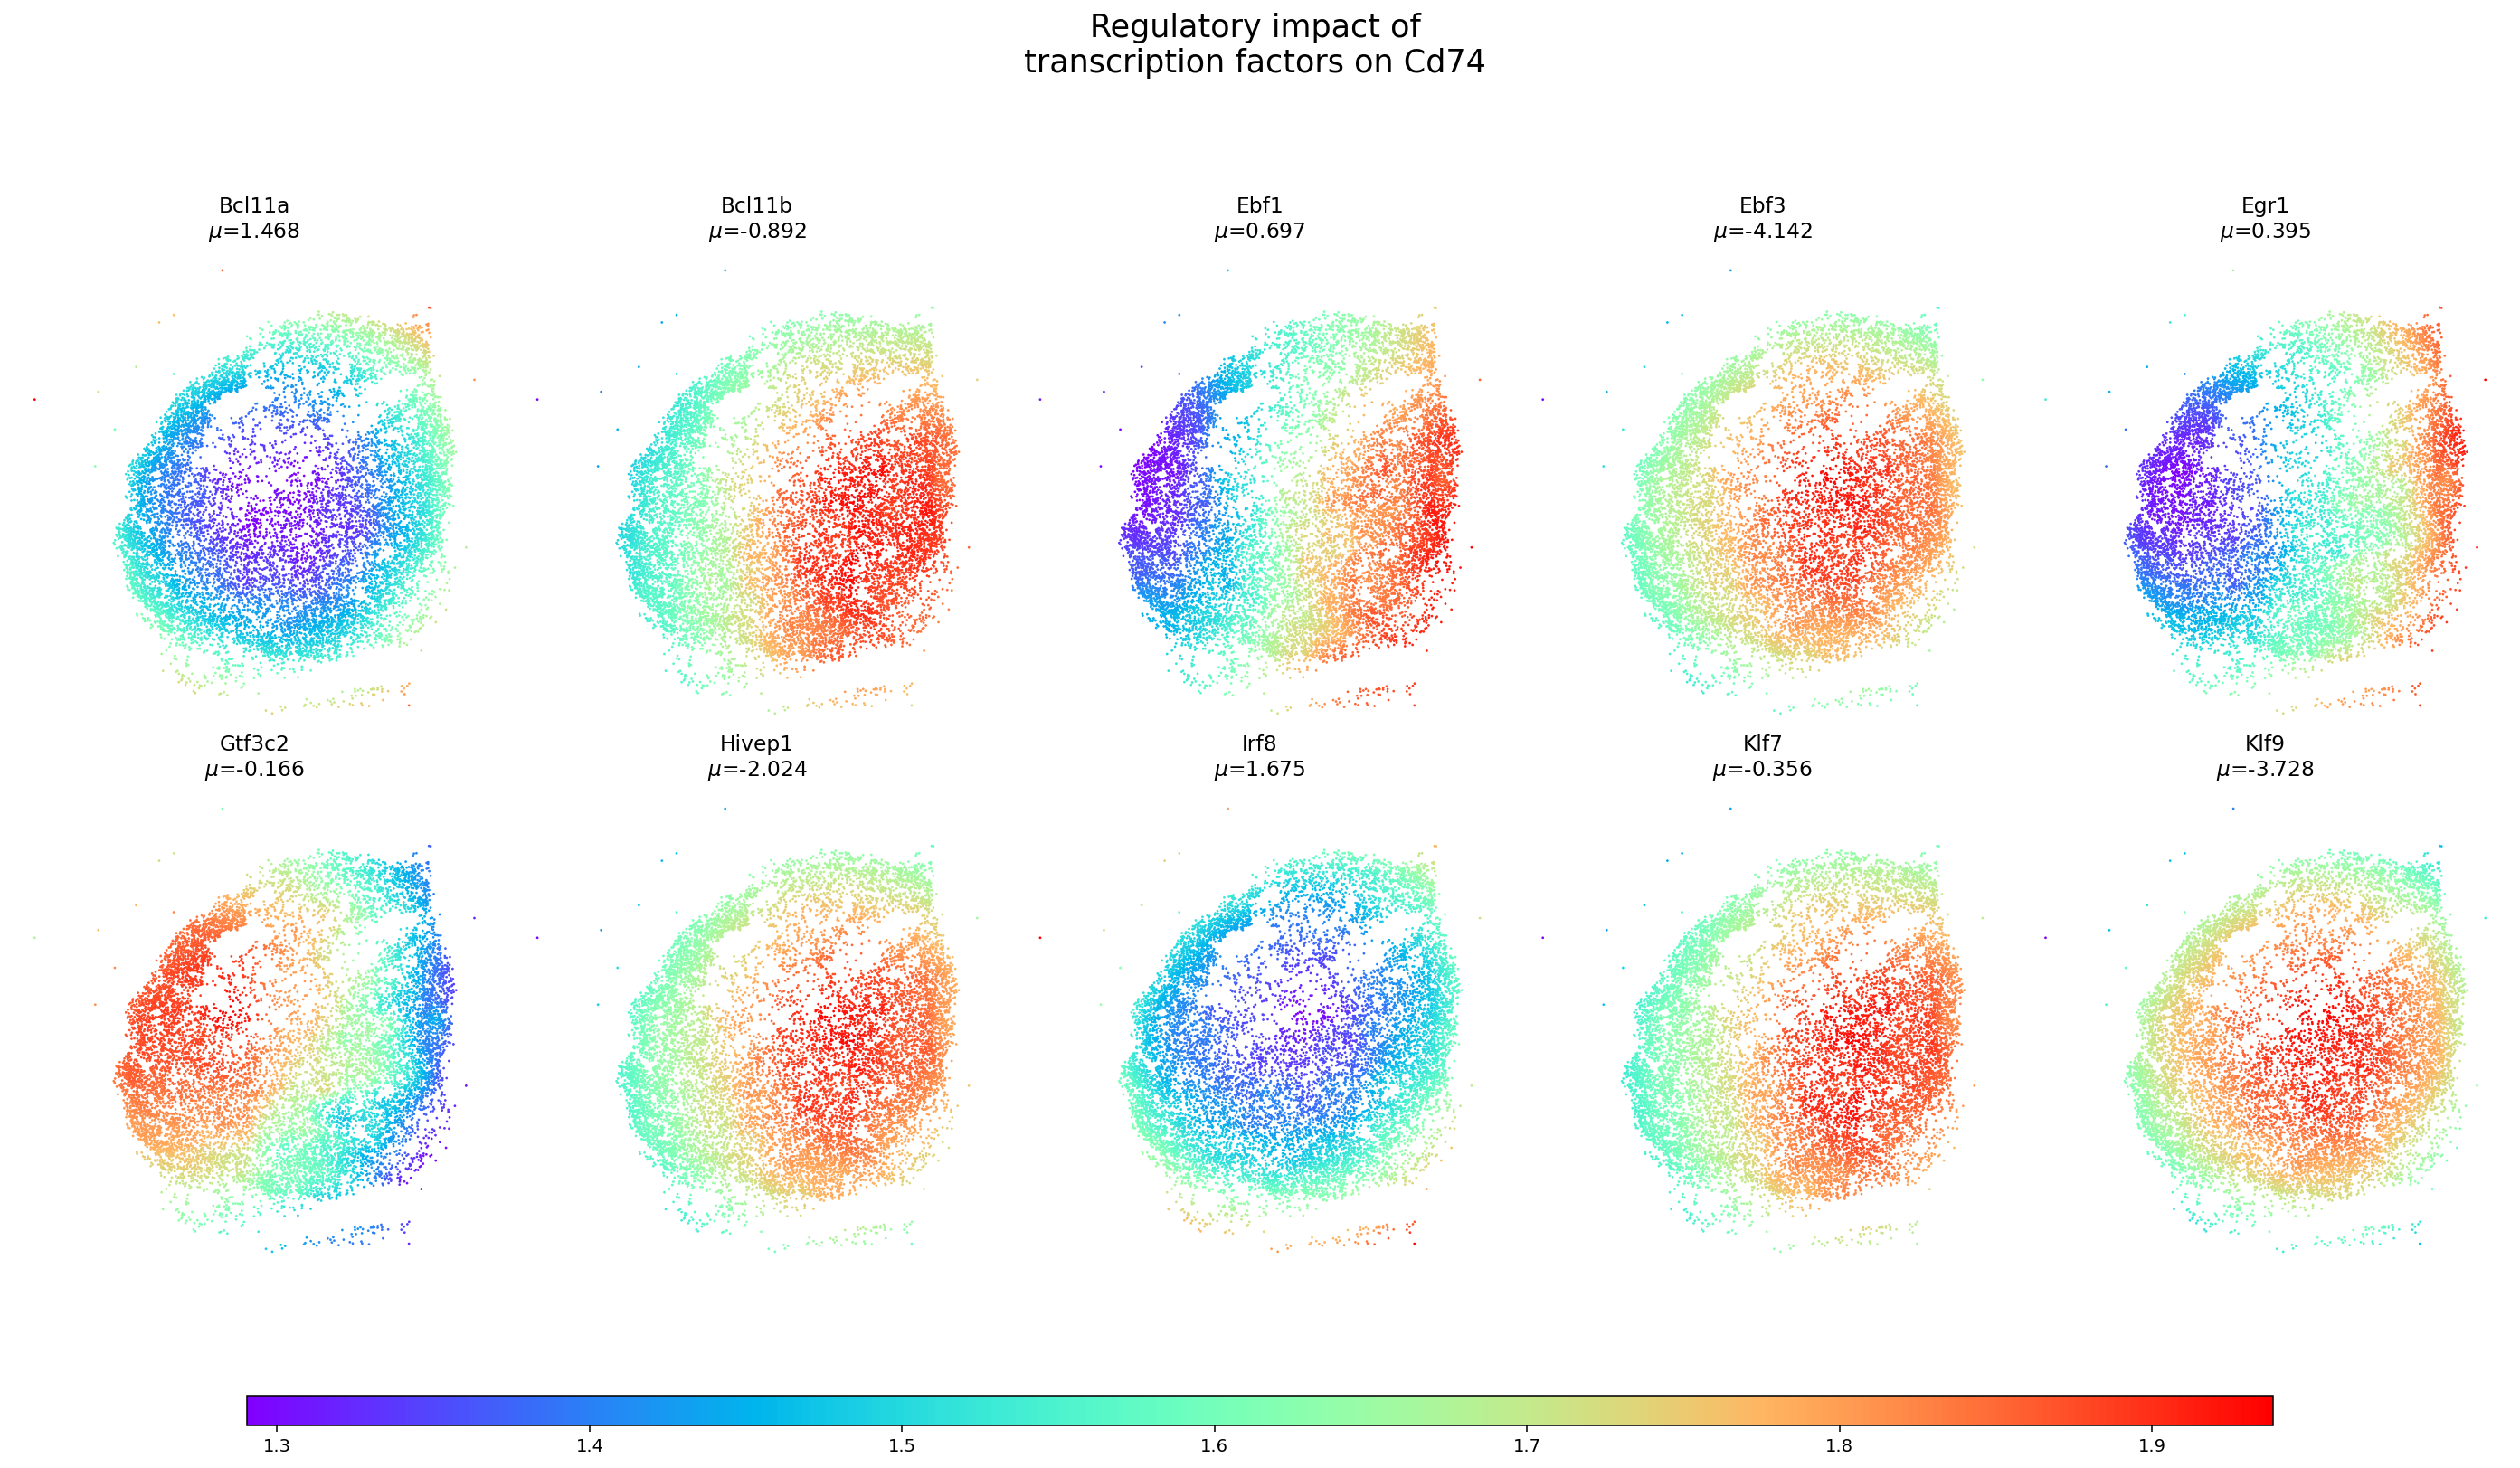

In [111]:
f, axs = plt.subplots(2, 5, figsize=(20, 12), dpi=140, sharex=True, sharey=True)
axs = axs.flatten()

scatter_plots = []

for i in range(len(axs)): 
    scatter = sns.scatterplot(x=adata_test.obsm['spatial'][:, 0], y=adata_test.obsm['spatial'][:, 1], 
                s=2, c=betas_test[:, i+1], cmap='rainbow', 
                ax=axs[i], edgecolor=None, linewidth=0, 
    )
    scatter_plots.append(scatter)

beta_means = list(betas_test.mean(0))
for ix, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{regulators[ix]}\n'+ r'$\mu$' + f'={beta_means[ix+1]:.3f}')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.tight_layout()
f.subplots_adjust(bottom=0.15)

# Add a colorbar
cbar_ax = f.add_axes([0.1, 0.05, 0.8, 0.02])
colorbar = f.colorbar(
    scatter_plots[0].collections[0], cax=cbar_ax, orientation='horizontal')


plt.suptitle(f'Regulatory impact of \ntranscription factors on {target_gene} ', fontsize=18)
plt.subplots_adjust(top=0.825)

plt.show()